<a href="https://colab.research.google.com/github/Timecapp/XAI_Capstone/blob/main/4thBrain_WBC_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOURTHBRAIN MLE 10
> SAMSUNG INDUSTRY CAPSTONE PROJECT


# HISTOPATHOLOGICAL BREAST CANCER DETECTION & EXPLAINABILITY

> TEAM: **DR. SHAISTA HUSSAIN & MR. PEDRAM EMAMI**

> NB:  WISCONSIN BREAST CANCER (DIAGNOSTIC) DATASET

# **INTRODUCTION**

> Histopathological images are the gold standard in detecting breast cancers. A biopsy is a surgically removed section of tissue from a region of concern of disease. This tissue is processed with dyes and Hematoxylin and Eosin (H&E) stains; where Hematoxylin stains the nuclei dark blue/purple and Eosin stains other cellular components pink/red and orange. The tissue is cut and frozen into a section on a slide, which is then examined under a microscope. The staining enables a pathologist to visualize the tissue structure and differentiate between healthy and diseased (benign or malignant) tissue.

> Early identification of breast cancer is important and is achieved by screening detection methods. Time is the crucial factor where early identification of malignant cells enables more favourable interventional prognosis; whereas late detection subjects patients to more complex therapeutics and lower survival rates (Salod & Singh, 2020). Explainable Artificial Intelligence (XAI) is an emerging domain aimed at designing intelligent systems that are capable of explaining their recommendations to a human being (Lamy et al., 2019).

# BUSINESS PROBLEM
Manual analysis of large breast cancer histopathology datasets is not practical;as it is extensively time-consuming and leaves a gap for subjective pathologist interpretations. While Machine Learning has produced successful results for classifying digital Whole Slide Images as normal, benign or malignant; the explainability, or specific justifications, for how the algorithm reaches its decision with accuracy, is clouded in Neural Networks black-boxes which limit both transparency and accountability.

The aim of this Capstone has been to generate an interpretable machine learning algorithm tool to augment the current understanding the underlying mechanisms involved in arriving at a decision from the data. This work employs Linear Regression and Random Forest for data exploration and model prediction; Radviz were used as visualization technique for feature selection; and, a Decision Tree algorithm was used to create a model that are able to differentiate between Malignant and Benign breast tumors from breast mass images. Several XAI outputs are explored.

# **DATA**
# SOURCE
* The Wisconsin-Breast Cancer (Diagnostics) dataset (WBC) was downloaded from the UCI machine learning repository.
* It is a classification dataset, which records the measurements for breast cancer cases. 
* There are two classes, benign and malignant. 
* The malignant class of this dataset is downsampled to 21 points, which are considered as outliers, while points in the benign class are considered inliers.
* The dataset was created by Dr. William H. Wolberg, at the University Of Wisconsin Hospital at Madison, Wisconsin,USA. 
* Dr. Wolberg used fine needle aspirates from patients with solid breast masses and digitally analysed cytological features. 
* The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

# DISTRIBUTION
* Train 80%
* Test 20%

# FORMAT
* Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign) 

# FEATURES
* computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

# **OBJECTIVES**
**GOALS**
>  produce a model that is capable of feature analysis to produce a diagnosis of normal/benign or malignant
> use accuracy metrics and LIME or SHAP or XGBoost to help with explainability (justification for diagnosis)
> compare diagnostic accuracy and explainability whole slide image analysis (in BreakHis notebook) to determine the more appropriate approach to healthcare xAI
 
**RESEARCH QUESTIONS**

> Can we use deep learning to detect malignancies with the same or higher accuracy and confidence as existing models?

> What are bias and errors in our model, and what are solutions to these?

# **BASELINE**
The proposed data was an annotated wholeslide image dataset of canine breast
cancer that was more relevant to the precursor study of translating animal histopathology into useful human pathological analysis (https://www.nature.com/articles/s41597-020-00756-z) (Aubreville et al., 2020).

We have opted to use the well known Wisconsin Breast Cancer (Diagnostic) dataset, and have compared existing models using this dataset for comparison.


**WBC Models & Baseline Comparison**
1.  CNN / Keras   https://www.kaggle.com/code/luckyapollo/predict-idc-in-breast-cancer-histology-images/edit 

2.  Huang, Y (2020). Wisconsin Dataset . https://towardsdatascience.com/explainable-deep-learning-in-breast-cancer-prediction-ae36c638d2a4 used LIME
- to explain the IDC image prediction results of a 2D ConvNet model in breast cancer diagnosis. 
- Explanations of model prediction of both IDC and non-IDC were provided by setting the number of super-pixels/features (i.e., the num_features parameter in the method get_image_and_mask()) to 20.
- observed that the explanation results are sensitive to the choice of the number of super pixels/features. 
- explanations via highlighted bounding boxes
- recommendations: 
- Domain knowledge to adjust parameters 
- Quality of the input data (pixels) 
- Accuracy can be improved by adding more samples.

3. Mooney, IDC Breast Cancer.  https://www.kaggle.com/code/paultimothymooney/predicting-idc-in-breast-cancer-histology-images/notebook 
- 76% accuracy
- recommendations: 
- Improve data visualization 
- Optimize data augmentation 
- Optimize NN architecture

# **NOTEBOOK SECTION**

# IMPORTING RESOURCES

In [ ]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import resources
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from interpret.blackbox import LimeTabular,ShapKernel,PartialDependence,MorrisSensitivity

from interpret import show

from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x:'%.3f' % x)

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

# EXPLORATORY DATA ANALYSIS

> The Wisconsin WSI Breast Cancer dataset consists of 5,547 50x50 pixel RGB digital images of H&E-stained breast histopathology samples. These images are labeled as either IDC or non-IDC. There are 2,788 IDC images and 2,759 non-IDC images. Those images have already been transformed into Numpy arrays and stored in the X.npy file. Similarly the corresponding labels are stored in the Y.npy file in Numpy array format.

In [ ]:
#Loading
df = pd.read_csv('/content/drive/MyDrive/capstone_breast/BCW_data.csv')

#Start EDA
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)

print(df.shape)
df.head()

(569, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1       17.990        10.380         122.800   1001.000   
1          1       20.570        17.770         132.900   1326.000   
2          1       19.690        21.250         130.000   1203.000   
3          1       11.420        20.380          77.580    386.100   
4          1       20.290        14.340         135.100   1297.000   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.118             0.278           0.300                0.147   
1            0.085             0.079           0.087                0.070   
2            0.110             0.160           0.197                0.128   
3            0.142             0.284           0.241                0.105   
4            0.100             0.133           0.198                0.104   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          0.242  ...        25.380         17.330          184.600   
1          0.181  ...        24.990         23.410          158.800   
2          0.207  ...        23.570         25.530          152.500   
3          0.260  ...        14.910         26.500           98.870   
4          0.181  ...        22.540         16.670          152.200   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2019.000             0.162              0.666            0.712   
1    1956.000             0.124              0.187            0.242   
2    1709.000             0.144              0.424            0.450   
3     567.700             0.210              0.866            0.687   
4    1575.000             0.137              0.205            0.400   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                 0.265           0.460                    0.119  
1                 0.186           0.275                    0.089  
2                 0.243           0.361                    0.088  
3                 0.258           0.664                    0.173  
4                 0.163           0.236                    0.077  

[5 rows x 31 columns]

In [ ]:
print(df.shape)
df.head()

(496, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1          1       20.570        17.770         132.900   1326.000   
2          1       19.690        21.250         130.000   1203.000   
4          1       20.290        14.340         135.100   1297.000   
5          1       12.450        15.700          82.570    477.100   
6          1       18.250        19.980         119.600   1040.000   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.085             0.079           0.087                0.070   
2            0.110             0.160           0.197                0.128   
4            0.100             0.133           0.198                0.104   
5            0.128             0.170           0.158                0.081   
6            0.095             0.109           0.113                0.074   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1          0.181  ...        24.990         23.410          158.800   
2          0.207  ...        23.570         25.530          152.500   
4          0.181  ...        22.540         16.670          152.200   
5          0.209  ...        15.470         23.750          103.400   
6          0.179  ...        22.880         27.660          153.200   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1    1956.000             0.124              0.187            0.242   
2    1709.000             0.144              0.424            0.450   
4    1575.000             0.137              0.205            0.400   
5     741.600             0.179              0.525            0.535   
6    1606.000             0.144              0.258            0.378   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
1                 0.186           0.275                    0.089  
2                 0.243           0.361                    0.088  
4                 0.163           0.236                    0.077  
5                 0.174           0.399                    0.124  
6                 0.193           0.306                    0.084  

[5 rows x 31 columns]

In [ ]:
df.describe().T

count    mean     std     min     25%     50%  \
diagnosis               569.000   0.373   0.484   0.000   0.000   0.000   
radius_mean             569.000  14.127   3.524   6.981  11.700  13.370   
texture_mean            569.000  19.290   4.301   9.710  16.170  18.840   
perimeter_mean          569.000  91.969  24.299  43.790  75.170  86.240   
area_mean               569.000 654.889 351.914 143.500 420.300 551.100   
smoothness_mean         569.000   0.096   0.014   0.053   0.086   0.096   
compactness_mean        569.000   0.104   0.053   0.019   0.065   0.093   
concavity_mean          569.000   0.089   0.080   0.000   0.030   0.062   
concave points_mean     569.000   0.049   0.039   0.000   0.020   0.034   
symmetry_mean           569.000   0.181   0.027   0.106   0.162   0.179   
fractal_dimension_mean  569.000   0.063   0.007   0.050   0.058   0.062   
radius_se               569.000   0.405   0.277   0.112   0.232   0.324   
texture_se              569.000   1.217   0.552   0.360   0.834   1.108   
perimeter_se            569.000   2.866   2.022   0.757   1.606   2.287   
area_se                 569.000  40.337  45.491   6.802  17.850  24.530   
smoothness_se           569.000   0.007   0.003   0.002   0.005   0.006   
compactness_se          569.000   0.025   0.018   0.002   0.013   0.020   
concavity_se            569.000   0.032   0.030   0.000   0.015   0.026   
concave points_se       569.000   0.012   0.006   0.000   0.008   0.011   
symmetry_se             569.000   0.021   0.008   0.008   0.015   0.019   
fractal_dimension_se    569.000   0.004   0.003   0.001   0.002   0.003   
radius_worst            569.000  16.269   4.833   7.930  13.010  14.970   
texture_worst           569.000  25.677   6.146  12.020  21.080  25.410   
perimeter_worst         569.000 107.261  33.603  50.410  84.110  97.660   
area_worst              569.000 880.583 569.357 185.200 515.300 686.500   
smoothness_worst        569.000   0.132   0.023   0.071   0.117   0.131   
compactness_worst       569.000   0.254   0.157   0.027   0.147   0.212   
concavity_worst         569.000   0.272   0.209   0.000   0.115   0.227   
concave points_worst    569.000   0.115   0.066   0.000   0.065   0.100   
symmetry_worst          569.000   0.290   0.062   0.157   0.250   0.282   
fractal_dimension_worst 569.000   0.084   0.018   0.055   0.071   0.080   

                             75%      max  
diagnosis                  1.000    1.000  
radius_mean               15.780   28.110  
texture_mean              21.800   39.280  
perimeter_mean           104.100  188.500  
area_mean                782.700 2501.000  
smoothness_mean            0.105    0.163  
compactness_mean           0.130    0.345  
concavity_mean             0.131    0.427  
concave points_mean        0.074    0.201  
symmetry_mean              0.196    0.304  
fractal_dimension_mean     0.066    0.097  
radius_se                  0.479    2.873  
texture_se                 1.474    4.885  
perimeter_se               3.357   21.980  
area_se                   45.190  542.200  
smoothness_se              0.008    0.031  
compactness_se             0.032    0.135  
concavity_se               0.042    0.396  
concave points_se          0.015    0.053  
symmetry_se                0.023    0.079  
fractal_dimension_se       0.005    0.030  
radius_worst              18.790   36.040  
texture_worst             29.720   49.540  
perimeter_worst          125.400  251.200  
area_worst              1084.000 4254.000  
smoothness_worst           0.146    0.223  
compactness_worst          0.339    1.058  
concavity_worst            0.383    1.252  
concave points_worst       0.161    0.291  
symmetry_worst             0.318    0.664  
fractal_dimension_worst    0.092    0.207

In [ ]:
#check for missing values
df.isnull().sum().sum()

0

# PLOT BENIGN V MALIGNANT

AttributeError: ignored

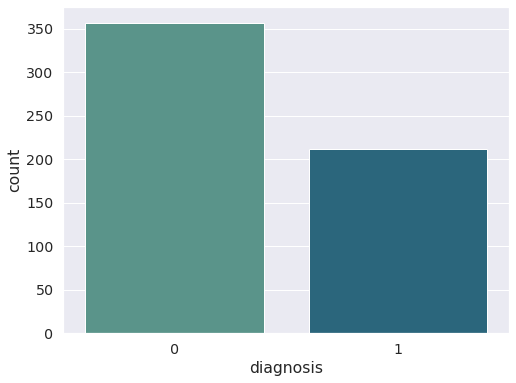

In [ ]:
#visualize categories
plt.figure(figsize=(8, 6))
ax = sns.countplot(df.diagnosis, palette='crest')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

ax.set_title('M=1  B=0')

# HEATMAP [CORRELATION OF FEATURES]

This will visually plot the strength of the relationships between the variables. 

The rows represent the relationship between each pair of variables. 

The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship. 

The color-coding of the cells makes it easy to identify relationships between variables at a glance.



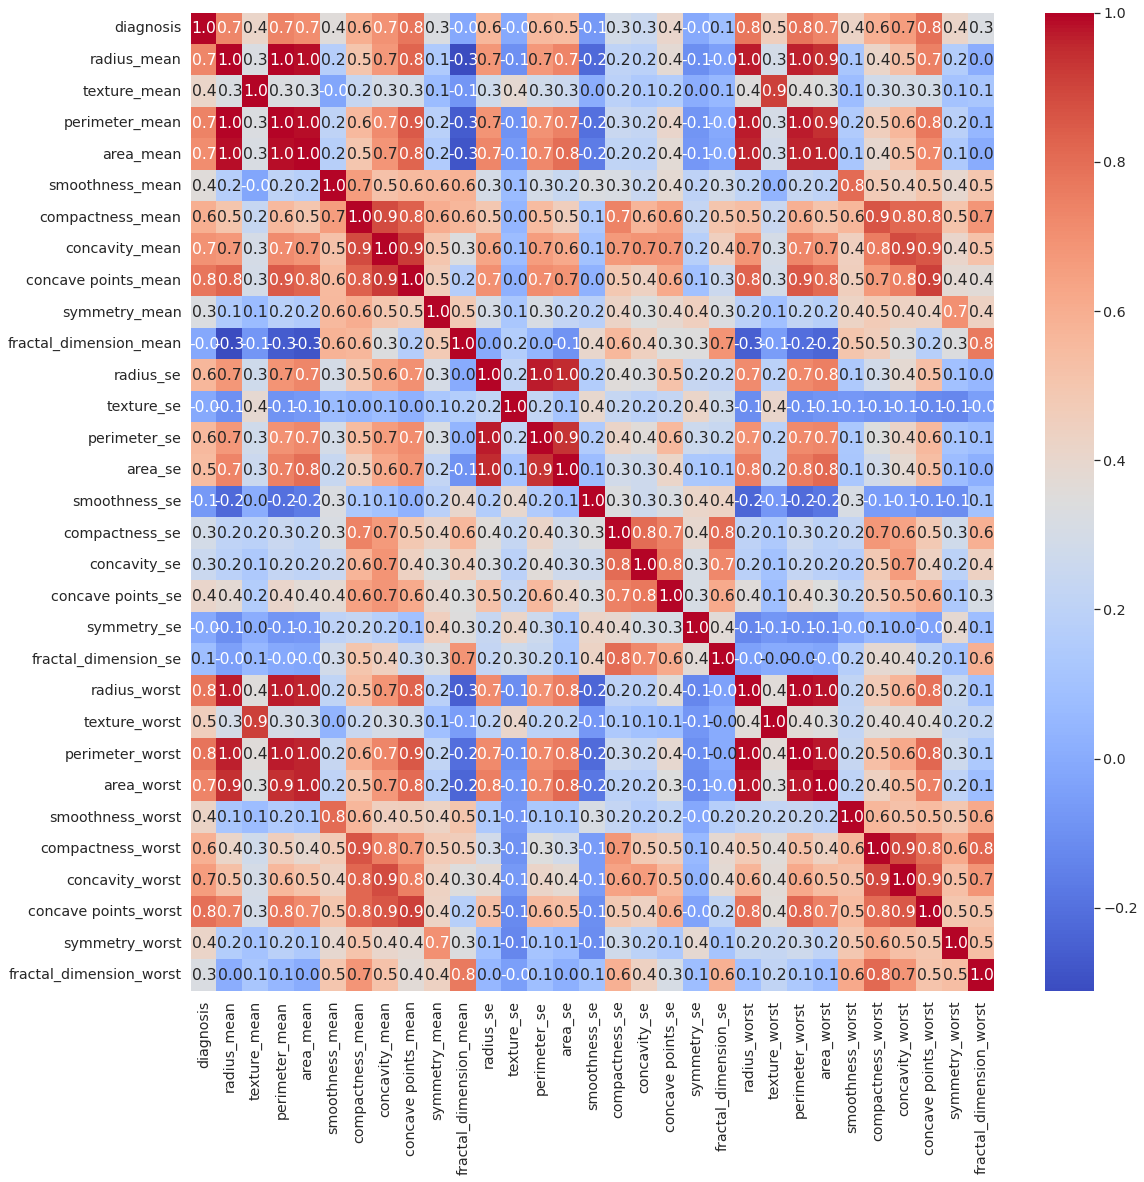

In [ ]:
#correlation analysis
plt.figure(figsize=(18,18))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot = True, fmt='.1f')

In [ ]:
#important features
corr.sort_values(['diagnosis'], ascending=False, inplace=True)
corr.diagnosis[:25]

diagnosis                 1.000
concave points_worst      0.794
perimeter_worst           0.783
concave points_mean       0.777
radius_worst              0.776
perimeter_mean            0.743
area_worst                0.734
radius_mean               0.730
area_mean                 0.709
concavity_mean            0.696
concavity_worst           0.660
compactness_mean          0.597
compactness_worst         0.591
radius_se                 0.567
perimeter_se              0.556
area_se                   0.548
texture_worst             0.457
smoothness_worst          0.421
symmetry_worst            0.416
texture_mean              0.415
concave points_se         0.408
smoothness_mean           0.359
symmetry_mean             0.330
fractal_dimension_worst   0.324
compactness_se            0.293
Name: diagnosis, dtype: float64

In [ ]:
#skewness
df_skew = pd.DataFrame(data={
    'skewness': df.skew()
})

df_skew

skewness
diagnosis                   0.528
radius_mean                 0.942
texture_mean                0.650
perimeter_mean              0.991
area_mean                   1.646
smoothness_mean             0.456
compactness_mean            1.190
concavity_mean              1.401
concave points_mean         1.171
symmetry_mean               0.726
fractal_dimension_mean      1.304
radius_se                   3.089
texture_se                  1.646
perimeter_se                3.444
area_se                     5.447
smoothness_se               2.314
compactness_se              1.902
concavity_se                5.110
concave points_se           1.445
symmetry_se                 2.195
fractal_dimension_se        3.924
radius_worst                1.103
texture_worst               0.498
perimeter_worst             1.128
area_worst                  1.859
smoothness_worst            0.415
compactness_worst           1.474
concavity_worst             1.150
concave points_worst        0.493
symmetry_worst              1.434
fractal_dimension_worst     1.663

The skewness is a measurent of the asymmetry of distribution.



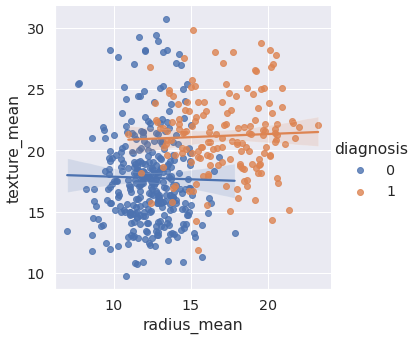

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)
#Visualize Plot

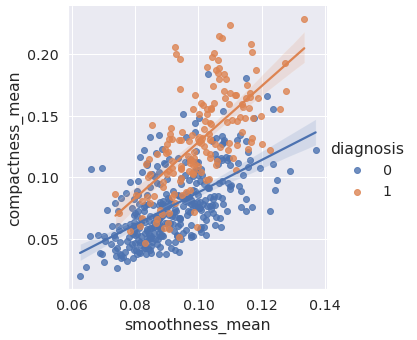

In [ ]:
#Visualize Plot
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = df, hue = 'diagnosis')

The log transformation is to transform skewed data to approximately conform toward normality.

In [ ]:
#Log transformation of skewed 
df.radius_se = np.log(df.radius_se + 1)
df.perimeter_se = np.log(df.perimeter_se + 1)
df.area_se = np.log(df.area_se)
df.concavity_se = np.log(df.concavity_se + 1)
df.fractal_dimension_se = np.log(df.fractal_dimension_se)

In [ ]:
#Detect and remove the outliers with Z-score
z = np.abs(stats.zscore(df))

print(df.shape)

(569, 31)


In [ ]:
df = df[(z < 3).all(axis=1)]

print(df.shape)
df.head()

(496, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1          1       20.570        17.770         132.900   1326.000   
2          1       19.690        21.250         130.000   1203.000   
4          1       20.290        14.340         135.100   1297.000   
5          1       12.450        15.700          82.570    477.100   
6          1       18.250        19.980         119.600   1040.000   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1            0.085             0.079           0.087                0.070   
2            0.110             0.160           0.197                0.128   
4            0.100             0.133           0.198                0.104   
5            0.128             0.170           0.158                0.081   
6            0.095             0.109           0.113                0.074   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1          0.181  ...        24.990         23.410          158.800   
2          0.207  ...        23.570         25.530          152.500   
4          0.181  ...        22.540         16.670          152.200   
5          0.209  ...        15.470         23.750          103.400   
6          0.179  ...        22.880         27.660          153.200   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1    1956.000             0.124              0.187            0.242   
2    1709.000             0.144              0.424            0.450   
4    1575.000             0.137              0.205            0.400   
5     741.600             0.179              0.525            0.535   
6    1606.000             0.144              0.258            0.378   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
1                 0.186           0.275                    0.089  
2                 0.243           0.361                    0.088  
4                 0.163           0.236                    0.077  
5                 0.174           0.399                    0.124  
6                 0.193           0.306                    0.084  

[5 rows x 31 columns]

> To address the data imbalance, we oversample the minority class using the Synthetic Minority Oversampling Technique (SMOTE).

> SMOTE selects examples that are close in the feature space, draws a line between the examples and draws a new sample at a point along that line.

> a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space (Brownlee, 2020).

In [ ]:
#data oversampling
y = df.diagnosis
X = df.drop('diagnosis', axis=1)
x_cols = X.columns.to_list()

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# VISUALIZE CATEGORIES

AttributeError: ignored

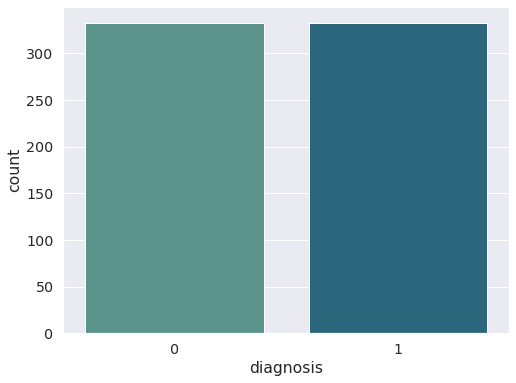

In [ ]:
#visualize
plt.figure(figsize=(8, 6))
ax = sns.countplot(y, palette='crest')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

ax.set_title('M=1  B=0')

# **MODEL TRAINING**

> StandardScaler removes the mean and then scales each feature to unit variance. 

> This operation is performed feature-wise in an independent way. 

> If outliers exist, then StandardScaler can be influenced by the outliers because it uses each feature's estimated empirical mean and standard deviation.

In [ ]:
#make predictions set Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_scaled, y, test_size=0.20, random_state=22)

# RANDOM FOREST

> The Random Forest builds decision trees on samples, and takes their majority vote for classification and average in case of regression.

> It is good becuase it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification. It performs better results for classification problems.

In [ ]:
#random forest
r_forest = RandomForestClassifier(max_depth=100, random_state=0)
r_forest.fit(x_train, y_train)
y_pred = r_forest.predict(x_valid)
rf_acc_score = accuracy_score(y_valid, y_pred)
print('Accuracy : %.3f' % (rf_acc_score))

# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# scores = cross_val_score(r_forest, x_train, y_train, scoring='accuracy', cv=cv)
# rf_score = np.mean(scores)

# print('Accuracy : %.3f' % (rf_score))
# y_pred = cross_val_predict(r_forest, x_train, y_train, cv=10)

Accuracy : 0.963


> The Random Forest accuracy is 96.3%

# CONFUSION MATRIX

> to define & visualize the model performance 

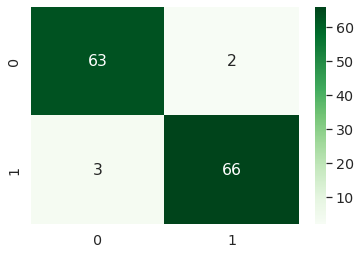

In [ ]:
cf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show() 


# CLASSIFICATION REPORT

> to measure the quality of predictions 

> ie. number of True Positives, False Positives, True negatives and False Negatives

In [ ]:
#classification report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.97      0.96      0.96        69

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



# ROC CURVE [RANDOM FOREST]

> to show the trade-off between sensitivity (or TPR) and specificity (1 – FPR). 

> Curves closer to the top-left corner indicate a better performance. 

> As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR).


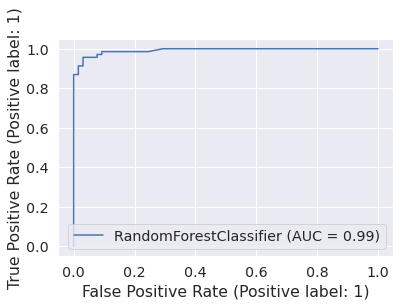

In [ ]:
plot_roc_curve(r_forest, x_valid, y_valid)

In [ ]:
import joblib
filename = './r_forest_model.pkl'
_ = joblib.dump(r_forest, filename)

# **XAI**

# LIME

> > Local interpretable model-agnostic explanations (LIME) 

* fits a surrogate glass-box model around the decision space of any black-box model’s prediction. 

* tries to model the local neighbourhood of any prediction. 

* works by perturbing any individual data point and generating synthetic data which gets evaluated by the black-box system and ultimately used as a training set for the glass-box model.

* designed to be applied locally.

> provides explanations which are interpretable by humans 

> explanations are different in representation from the intrinsic actual features used by the model. 



In [ ]:
# Apply lime

lime = LimeTabular(predict_fn=r_forest.predict_proba,data=x_train,random_state=0,feature_names=x_cols,n_jobs=-1)
# Get local explanations
lime_local = lime.explain_local(x_valid[-25:], y_valid[-25:], name='LIME')

show(lime_local)

# SHAPLEY

> to explain the contribution of individual features to the prediction at a specified query point


In [ ]:
# Shapley

shap = ShapKernel(predict_fn=r_forest.predict_proba,data=x_train,random_state=0,feature_names=x_cols,n_jobs=-1)
shap_local = shap.explain_local(x_valid[-25:], y_valid[-25:], name='Shapley')

show(shap_local)

  0%|          | 0/25 [00:00<?, ?it/s]

# PARTIAL DEPENDENCY PLOTS

> to show the dependence between the target response and features of interest, marginalizing over the values of all other input features (the 'complement' features).

> PDP shows the marginal effect one or two features have on the predicted outcome 

> can show whether the relationship between the target and a feature is linear, monotonic or more complex.

In [ ]:
# Partial Dependency Plots

pdp = PartialDependence(predict_fn=r_forest.predict_proba,data=x_train,feature_names=x_cols)
pdp_global = pdp.explain_global()

show(pdp_global)

# MORRIS SENSITIVITY ANALYSIS

* a One-step-at-a-time (OAT) **global **sensitivity analysis 
* only one input has its level (discretized value) adjusted per run. 
* fast (b/c fewer model executions) but comes at the cost of not being able to differentiate non-linearities with interactions. 
* commonly used for screening (where inputs are important enough for further analysis).

In [ ]:
# Morris Sensitivity Analysis

msa = MorrisSensitivity(predict_fn=r_forest.predict_proba,data=x_train,feature_names=x_cols)
msa_global = msa.explain_global()

show(msa_global)

# GAUSSIAN NB

>  probabilistic classification algorithm based on applying Bayes' theorem with strong independence assumptions.

In [ ]:
gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_valid)
nb_acc_score = accuracy_score(y_valid, y_pred)
print('Accuracy : %.3f' % (nb_acc_score))

# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# scores = cross_val_score(r_forest, x_train, y_train, scoring='accuracy', cv=cv)
# rf_score = np.mean(scores)

# print('Accuracy : %.3f' % (rf_score))
# y_pred = cross_val_predict(r_forest, x_train, y_train, cv=10)

Accuracy : 0.940


Gaussian NB accuracy is 94%

# CONFUSION MATRIX

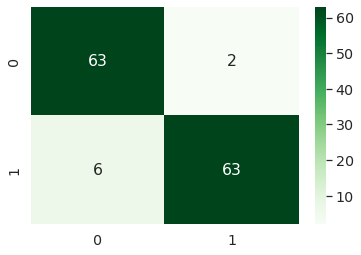

In [ ]:
cf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap="Greens")
plt.show()

# CLASSIFICATION REPORT

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.97      0.91      0.94        69

    accuracy                           0.94       134
   macro avg       0.94      0.94      0.94       134
weighted avg       0.94      0.94      0.94       134



# ROC CURVE [GAUSSIAN NB]

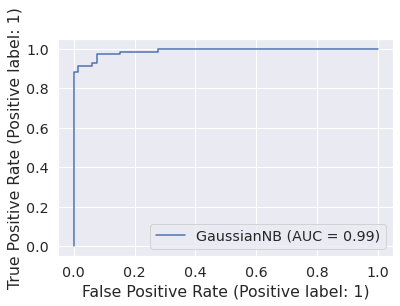

In [ ]:
plot_roc_curve(gauss_nb, x_valid, y_valid)

In [ ]:
import joblib
filename = './gauss_nb_model.pkl'
_ = joblib.dump(gauss_nb, filename)

# LIME

In [ ]:
# Apply lime

lime = LimeTabular(predict_fn=gauss_nb.predict_proba,data=x_train,random_state=0,feature_names=x_cols,n_jobs=-1)
# Get local explanations
lime_local = lime.explain_local(x_valid[-25:], y_valid[-25:], name='LIME')

show(lime_local)

# SHAPLEY

In [ ]:
# Shapley

shap = ShapKernel(predict_fn=gauss_nb.predict_proba,data=x_train,random_state=0,feature_names=x_cols,n_jobs=-1)
shap_local = shap.explain_local(x_valid[-25:], y_valid[-25:], name='Shapley')

show(shap_local)

  0%|          | 0/25 [00:00<?, ?it/s]

# PARTIAL DEPENDENCY PLOTS

In [ ]:
# Partial Dependency Plots

pdp = PartialDependence(predict_fn=gauss_nb.predict_proba,data=x_train,feature_names=x_cols)
pdp_global = pdp.explain_global()

show(pdp_global)

#  MORRIS SENSITIVITY ANALYSIS

In [ ]:
# Morris

msa = MorrisSensitivity(predict_fn=gauss_nb.predict_proba,data=x_train,feature_names=x_cols)
msa_global = msa.explain_global()

show(msa_global)

# DISCUSSION

**PERFORMANCE METRICS**

**ANSWERS TO RESEARCH QUESTIONS**

> Can we use deep learning to detect malignancies with the same or higher accuracy and confidence as existing models?

- SVM, ANN, random forest and decision tree are efficiently working on image datasets and can be an alternative for CNN (Jackhar et al., 2022)

> What are bias and errors in our model, and what are solutions to these?

# CONCLUSIONS

This notebook yielded....

The WBC yieled....

Compared to other studies....


We conclude that the best ....

# QUESTIONS

Does increasing a training data set size and any other factors in dataset/annotations improve explainability in this case? 

Effects of hyperparameter tuning?

# REFERENCES

- Aubreville, M., Bertram, C.A., Donovan, T.A. et al. A completely annotated whole slide image dataset of canine breast cancer to aid human breast cancer research. Sci Data 7, 417 (2020). https://doi.org/10.1038/s41597-020-00756-z

- Breast Cancer Histopathological Database (BreakHis) (2022). Laboratório Visão Robótica e Imagem. https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/ 

- Breast Cancer Wisconsin (Diagnostic) Data Set. (2022). UCI ML Repository https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

- Brownlee J. (2020. SMOTE for Imbalanced Classification with Python. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

- Jakhar AK, Gupta A, Singh M. (2022). SELF: A Stacked-based Ensemble Learning
Framework for Breast Cancer Classication. https://assets.researchsquare.com/files/rs-2013877/v2_covered.pdf?c=1667795805

- Kaplun D, Krasichkov A, Chetyrbok P, Oleinikov N, Garg A, Pannu HS. (2021).Cancer Cell Profiling Using Image Moments and Neural Networks with Model Agnostic Explainability: A Case Study of Breast Cancer Histopathological (BreakHis) Database. Mathematics. 2021; 9(20):2616. https://doi.org/10.3390/math9202616

- Lamy JB, Sekar B, Guezennec G, Bouaud J, Séroussi B (2019).
Explainable artificial intelligence for breast cancer: A visual case-based reasoning approach, Artificial Intelligence in Medicine,
Volume 94, 2019, Pages 42-53, ISSN 0933-3657,
https://doi.org/10.1016/j.artmed.2019.01.001.(https://www.sciencedirect.com/science/article/pii/S0933365718304846)

- Patrício C, Neves JC, Teixeira LF. (2022). Explainable Deep Learning Methods in Medical Imaging Diagnosis:
A Survey. 1, 1 (June 2022), 36 pages. https://doi.org/10.1145/nnnnnnn.nnnnnnn

- Rashmi R, Prasad K, Udupa CBK. (2021). Breast histopathological image analysis using image processing techniques for diagnostic puposes: A methodological review. J Med Syst. 2021 Dec 3;46(1):7. doi: 10.1007/s10916-021-01786-9. PMID: 34860316; PMCID: PMC8642363.

- Salod Z, Singh Y.(2020). A five-year (2015 to 2019) analysis of studies focused on breast cancer prediction using machine learning: A systematic review and bibliometric analysis. J Public Health Res. 2020 Jun 26;9(1):1792. doi: 10.4081/jphr.2020.1772. PMID: 32642458; PMCID: PMC7330506.

- Spanhol, F., Oliveira, L. S., Petitjean, C., and Heutte, L. (2016). Breast Cancer Histopathological Image Classification using Convolutional Neural Network, International Joint Conference on Neural Networks (IJCNN 2016), Vancouver, Canada, 2016.

- Spanhol, F., Cavalin, P.,  Oliveira, L. S., Petitjean, C., Heutte, L. (2017).Deep Features for Breast Cancer Histopathological Image Classification, 2017 IEEE International Conference on Systems, Man, and Cybernetics (IEEE SMC 2017), Banff, Canada, 2017

# THANK YOU FROM

**Dr. Shaista Hussain**
**&**
**Mr. Pedram Emami**  

> Fourthbrain MLE 10 Cohort 

🐪